## Define Gameweek and Periods for FDR calculation

In [142]:
gameweek = 6
next_n_games = 2

#define percentage of time player needs to have played to be counted as active
min_min = ((gameweek-1)*90)/4     #<---- Currently 25% of playtime
print(min_min)

112.5


## Define Budget, Team Formation, and Budget Allocation by Position

In [1]:
#Budget
budget = 100

#Team Formation
DF = 3
MD = 4
ST = 3

#Total players needed per position
DF_max = 5
MD_max = 5
ST_max = 3

#Budget Allocation
GK_coef = 0.095
DF_coef = 0.285
MD_coef = 0.36
ST_coef = 0.26

## Scraped list of Schedules

In [2]:
schedules = ['Arsenal NEW (A) BUR (H) LIV (A) TOT (H) WAT (A) AVL (H) MUN (A) BOU (H) SHU (A) CRY (H) WOL (H) LEI (A) SOU (H) NOR (A) BHA (H) WHU (A) MCI (H) EVE (A) BOU (A) CHE (H) MUN (H) CRY (A) SHU (H) CHE (A) BUR (A) NEW (H) EVE (H) MCI (A) WHU (H) BHA (A) SOU (A) NOR (H) WOL (A) LEI (H) TOT (A) LIV (H) AVL (A) WAT (H)',
 'Aston Villa TOT (A) BOU (H) EVE (H) CRY (A) WHU (H) ARS (A) BUR (H) NOR (A) BHA (H) MCI (A) LIV (H) WOL (A) NEW (H) MUN (A) CHE (A) LEI (H) SHU (A) SOU (H) NOR (H) WAT (A) BUR (A) MCI (H) BHA (A) WAT (H) BOU (A) TOT (H) SOU (A) SHU (H) LEI (A) CHE (H) NEW (A) WOL (H) LIV (A) MUN (H) CRY (H) EVE (A) ARS (H) WHU (A)',
 'Bournemouth SHU (H) AVL (A) MCI (H) LEI (A) EVE (H) SOU (A) WHU (H) ARS (A) NOR (H) WAT (A) MUN (H) NEW (A) WOL (H) TOT (A) CRY (A) LIV (H) CHE (A) BUR (H) ARS (H) BHA (A) WHU (A) WAT (H) NOR (A) BHA (H) AVL (H) SHU (A) BUR (A) CHE (H) LIV (A) CRY (H) WOL (A) NEW (H) MUN (A) TOT (H) LEI (H) MCI (A) SOU (H) EVE (A)',
 'Brighton WAT (A) WHU (H) SOU (H) MCI (A) BUR (H) NEW (A) CHE (A) TOT (H) AVL (A) EVE (H) NOR (H) MUN (A) LEI (H) LIV (A) ARS (A) WOL (H) CRY (A) SHU (H) TOT (A) BOU (H) CHE (H) EVE (A) AVL (H) BOU (A) WHU (A) WAT (H) SHU (A) CRY (H) WOL (A) ARS (H) LEI (A) MUN (H) NOR (A) LIV (H) MCI (H) SOU (A) NEW (H) BUR (A)',
 'Burnley SOU (H) ARS (A) WOL (A) LIV (H) BHA (A) NOR (H) AVL (A) EVE (H) LEI (A) CHE (H) SHU (A) WHU (H) WAT (A) CRY (H) MCI (H) TOT (A) NEW (H) BOU (A) EVE (A) MUN (H) AVL (H) CHE (A) LEI (H) MUN (A) ARS (H) SOU (A) BOU (H) NEW (A) TOT (H) MCI (A) WAT (H) CRY (A) SHU (H) WHU (A) LIV (A) WOL (H) NOR (A) BHA (H)',
 'Chelsea MUN (A) LEI (H) NOR (A) SHU (H) WOL (A) LIV (H) BHA (H) SOU (A) NEW (H) BUR (A) WAT (A) CRY (H) MCI (A) WHU (H) AVL (H) EVE (A) BOU (H) TOT (A) SOU (H) ARS (A) BHA (A) BUR (H) NEW (A) ARS (H) LEI (A) MUN (H) TOT (H) BOU (A) EVE (H) AVL (A) MCI (H) WHU (A) WAT (H) CRY (A) SHU (A) NOR (H) LIV (A) WOL (H)',
 'Crystal Palace EVE (H) SHU (A) MUN (A) AVL (H) TOT (A) WOL (H) NOR (H) WHU (A) MCI (H) ARS (A) LEI (H) CHE (A) LIV (H) BUR (A) BOU (H) WAT (A) BHA (H) NEW (A) WHU (H) SOU (A) NOR (A) ARS (H) MCI (A) SOU (H) SHU (H) EVE (A) NEW (H) BHA (A) WAT (H) BOU (A) LIV (A) BUR (H) LEI (A) CHE (H) AVL (A) MUN (H) WOL (A) TOT (H)',
 'Everton CRY (A) WAT (H) AVL (A) WOL (H) BOU (A) SHU (H) MCI (H) BUR (A) WHU (H) BHA (A) TOT (H) SOU (A) NOR (H) LEI (A) LIV (A) CHE (H) MUN (A) ARS (H) BUR (H) NEW (A) MCI (A) BHA (H) WHU (A) NEW (H) WAT (A) CRY (H) ARS (A) MUN (H) CHE (A) LIV (H) NOR (A) LEI (H) TOT (A) SOU (H) WOL (A) AVL (H) SHU (A) BOU (H)',
 'Leicester WOL (H) CHE (A) SHU (A) BOU (H) MUN (A) TOT (H) NEW (H) LIV (A) BUR (H) SOU (A) CRY (A) ARS (H) BHA (A) EVE (H) WAT (H) AVL (A) NOR (H) MCI (A) LIV (H) WHU (A) NEW (A) SOU (H) BUR (A) WHU (H) CHE (H) WOL (A) MCI (H) NOR (A) AVL (H) WAT (A) BHA (H) EVE (A) CRY (H) ARS (A) BOU (A) SHU (H) TOT (A) MUN (H)',
 'Liverpool NOR (H) SOU (A) ARS (H) BUR (A) NEW (H) CHE (A) SHU (A) LEI (H) MUN (A) TOT (H) AVL (A) MCI (H) CRY (A) BHA (H) EVE (H) BOU (A) WAT (H) WHU (A) LEI (A) WOL (H) SHU (H) TOT (A) MUN (H) WOL (A) SOU (H) NOR (A) WHU (H) WAT (A) BOU (H) EVE (A) CRY (H) MCI (A) AVL (H) BHA (A) BUR (H) ARS (A) CHE (H) NEW (A)',
 'Man City WHU (A) TOT (H) BOU (A) BHA (H) NOR (A) WAT (H) EVE (A) WOL (H) CRY (A) AVL (H) SOU (H) LIV (A) CHE (H) NEW (A) BUR (A) MUN (H) ARS (A) LEI (H) WOL (A) SHU (H) EVE (H) AVL (A) CRY (H) SHU (A) TOT (A) WHU (H) LEI (A) ARS (H) MUN (A) BUR (H) CHE (A) LIV (H) SOU (A) NEW (H) BHA (A) BOU (H) WAT (A) NOR (H)',
 'Man Utd CHE (H) WOL (A) CRY (H) SOU (A) LEI (H) WHU (A) ARS (H) NEW (A) LIV (H) NOR (A) BOU (A) BHA (H) SHU (A) AVL (H) TOT (H) MCI (A) EVE (H) WAT (A) NEW (H) BUR (A) ARS (A) NOR (H) LIV (A) BUR (H) WOL (H) CHE (A) WAT (H) EVE (A) MCI (H) TOT (A) SHU (H) BHA (A) BOU (H) AVL (A) SOU (H) CRY (A) WHU (H) LEI (A)',
 'Newcastle ARS (H) NOR (A) TOT (A) WAT (H) LIV (A) BHA (H) LEI (A) MUN (H) CHE (A) WOL (H) WHU (A) BOU (H) AVL (A) MCI (H) SHU (A) SOU (H) BUR (A) CRY (H) MUN (A) EVE (H) LEI (H) WOL (A) CHE (H) EVE (A) NOR (H) ARS (A) CRY (A) BUR (H) SOU (A) SHU (H) AVL (H) BOU (A) WHU (H) MCI (A) WAT (A) TOT (H) BHA (A) LIV (H)',
 'Norwich LIV (A) NEW (H) CHE (H) WHU (A) MCI (H) BUR (A) CRY (A) AVL (H) BOU (A) MUN (H) BHA (A) WAT (H) EVE (A) ARS (H) SOU (A) SHU (H) LEI (A) WOL (H) AVL (A) TOT (H) CRY (H) MUN (A) BOU (H) TOT (A) NEW (A) LIV (H) WOL (A) LEI (H) SHU (A) SOU (H) EVE (H) ARS (A) BHA (H) WAT (A) WHU (H) CHE (A) BUR (H) MCI (A)',
 'Sheffield Utd BOU (A) CRY (H) LEI (H) CHE (A) SOU (H) EVE (A) LIV (H) WAT (A) ARS (H) WHU (A) BUR (H) TOT (A) MUN (H) WOL (A) NEW (H) NOR (A) AVL (H) BHA (A) WAT (H) MCI (A) LIV (A) WHU (H) ARS (A) MCI (H) CRY (A) BOU (H) BHA (H) AVL (A) NOR (H) NEW (A) MUN (A) TOT (H) BUR (A) WOL (H) CHE (H) LEI (A) EVE (H) SOU (A)',
 'Southampton BUR (A) LIV (H) BHA (A) MUN (H) SHU (A) BOU (H) TOT (A) CHE (H) WOL (A) LEI (H) MCI (A) EVE (H) ARS (A) WAT (H) NOR (H) NEW (A) WHU (H) AVL (A) CHE (A) CRY (H) TOT (H) LEI (A) WOL (H) CRY (A) LIV (A) BUR (H) AVL (H) WHU (A) NEW (H) NOR (A) ARS (H) WAT (A) MCI (H) EVE (A) MUN (A) BHA (H) BOU (A) SHU (H)',
 'Spurs AVL (H) MCI (A) NEW (H) ARS (A) CRY (H) LEI (A) SOU (H) BHA (A) WAT (H) LIV (A) EVE (A) SHU (H) WHU (A) BOU (H) MUN (A) BUR (H) WOL (A) CHE (H) BHA (H) NOR (A) SOU (A) LIV (H) WAT (A) NOR (H) MCI (H) AVL (A) CHE (A) WOL (H) BUR (A) MUN (H) WHU (H) SHU (A) EVE (H) BOU (A) ARS (H) NEW (A) LEI (H) CRY (A)',
 'Watford BHA (H) EVE (A) WHU (H) NEW (A) ARS (H) MCI (A) WOL (A) SHU (H) TOT (A) BOU (H) CHE (H) NOR (A) BUR (H) SOU (A) LEI (A) CRY (H) LIV (A) MUN (H) SHU (A) AVL (H) WOL (H) BOU (A) TOT (H) AVL (A) EVE (H) BHA (A) MUN (A) LIV (H) CRY (A) LEI (H) BUR (A) SOU (H) CHE (A) NOR (H) NEW (H) WHU (A) MCI (H) ARS (A)',
 'West Ham MCI (H) BHA (A) WAT (A) NOR (H) AVL (A) MUN (H) BOU (A) CRY (H) EVE (A) SHU (H) NEW (H) BUR (A) TOT (H) CHE (A) WOL (A) ARS (H) SOU (A) LIV (H) CRY (A) LEI (H) BOU (H) SHU (A) EVE (H) LEI (A) BHA (H) MCI (A) LIV (A) SOU (H) ARS (A) WOL (H) TOT (A) CHE (H) NEW (A) BUR (H) NOR (A) WAT (H) MUN (A) AVL (H)',
 'Wolves LEI (A) MUN (H) BUR (H) EVE (A) CHE (H) CRY (A) WAT (H) MCI (A) SOU (H) NEW (A) ARS (A) AVL (H) BOU (A) SHU (H) WHU (H) BHA (A) TOT (H) NOR (A) MCI (H) LIV (A) WAT (A) NEW (H) SOU (A) LIV (H) MUN (A) LEI (H) NOR (H) TOT (A) BHA (H) WHU (A) BOU (H) AVL (A) ARS (H) SHU (A) EVE (H) BUR (A) CRY (H) CHE (A)']

### Import Data

In [3]:
import json
import requests
import pandas as pd

# url = "https://fantasy.premierleague.com/drf/bootstrap-static"
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

def get_json_data(url):
    response = requests.get(url)
    jobs = response.json()
    return jobs

#filter out players with less than 330
all_players = get_json_data(url)['elements']
all_teams = get_json_data(url)['teams']
positions = get_json_data(url)['element_types']

### Get Team Table

In [4]:
table_url = 'https://www.premierleague.com/tables'

def build_table(table_url):
    team_table = pd.read_html(table_url)
    team_df = pd.DataFrame(team_table[0])
    team_df = team_df[team_df['Unnamed: 12'].isna()]
    team_df = team_df.iloc[:,1:10]
    team_df.Club = team_df.Club.map(lambda x: x[-3:])
    team_df.reset_index()
    team_df.index = np.arange(1, len(team_df) + 1)
    team_df.columns = ['Team', 'Played', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
    team_df.index.name = 'Position'
    
    return team_df

In [5]:
table_df = build_table(table_url)

In [6]:
table_df.head()

,Team,Played,W,D,L,GF,GA,GD,Pts
Position,,,,,,,,,
1,LIV,5,5,0,0,15,4,+11,15
2,MCI,5,3,1,1,16,6,+10,10
3,TOT,5,2,2,1,11,6,+5,8
4,MUN,5,2,2,1,8,4,+4,8
5,LEI,5,2,2,1,6,4,+2,8


## Add player status and ROI, pts-per-90min metrics to final player_df

In [7]:
def attach_team_and_position(main_players, all_teams, positons):
    players = main_players.copy()
    for team in all_teams:
        for player in players:
            if team['code'] == player['team_code']:
                player['team_name'] = team['name']
    for position in positions:
        for player in players:
            if position['id'] == player['element_type']:
                player['position'] = position['singular_name']
    for player in players:
        if player['status'] == "a":
            player['status'] = "available"
        elif player['status'] == "d":
            player['status'] = "doubtful"
        elif player['status'] == "i":
            player['status'] = "injured"
        elif player['status'] == "s":
            player['status'] = "suspended"
    return players


#### Temporarily took out the "main_players" filter because no players have played 330 minutes ####

# player_positions_teams = attach_team_and_position(main_players, all_teams_new, positions)
player_positions_teams = attach_team_and_position(all_players, all_teams, positions)


def final_players_list(player_positions_teams):
    players = player_positions_teams.copy()
    empty = []
    for player in players:
        stats = dict(team_code = player['team_code'],
        team_name = player['team_name'],
        name = player['first_name'] + " " + player['second_name'],
        status = player['status'],
        position = player['position'],
        cost = (player['now_cost'])/10,
        total_points = player['total_points'],
        roi = round((player['total_points'] / player['now_cost'])*10, 2),
        pts_per_90min = round((player['total_points'] / (player['minutes'] + 1))*90, 2),
        bonus = player['bonus'],
        red_cards = player['red_cards'],
        minutes = player['minutes'],
        transfers_out = player['transfers_out'],
        transfers_in = player['transfers_in'])
        empty.append(stats)
    return empty

In [8]:
final = final_players_list(player_positions_teams)

In [9]:
final[0]

{'team_code': 3,
 'team_name': 'Arsenal',
 'name': 'Shkodran Mustafi',
 'status': 'available',
 'position': 'Defender',
 'cost': 5.3,
 'total_points': 0,
 'roi': 0.0,
 'pts_per_90min': 0.0,
 'bonus': 0,
 'red_cards': 0,
 'minutes': 0,
 'transfers_out': 23554,
 'transfers_in': 4594}

In [10]:
all_teams[0]

{'code': 3,
 'draw': 0,
 'form': None,
 'id': 1,
 'loss': 0,
 'name': 'Arsenal',
 'played': 0,
 'points': 0,
 'position': 0,
 'short_name': 'ARS',
 'strength': 4,
 'team_division': None,
 'unavailable': False,
 'win': 0,
 'strength_overall_home': 1250,
 'strength_overall_away': 1330,
 'strength_attack_home': 1210,
 'strength_attack_away': 1260,
 'strength_defence_home': 1290,
 'strength_defence_away': 1330}

### Get Total ROI, Points and 90min before filtering injured and FDR

In [11]:
total_roi = sorted(final, key = lambda x: x['roi'], reverse = True)

In [12]:
total_roi[:2]

[{'team_code': 45,
  'team_name': 'Norwich',
  'name': 'Teemu Pukki',
  'status': 'available',
  'position': 'Forward',
  'cost': 7.1,
  'total_points': 49,
  'roi': 6.9,
  'pts_per_90min': 9.95,
  'bonus': 9,
  'red_cards': 0,
  'minutes': 442,
  'transfers_out': 376346,
  'transfers_in': 2752704},
 {'team_code': 8,
  'team_name': 'Chelsea',
  'name': 'Tammy Abraham',
  'status': 'available',
  'position': 'Forward',
  'cost': 7.3,
  'total_points': 42,
  'roi': 5.75,
  'pts_per_90min': 11.52,
  'bonus': 9,
  'red_cards': 0,
  'minutes': 327,
  'transfers_out': 231001,
  'transfers_in': 1574029}]

### Total_Points

In [13]:
total_max_pts = sorted(total_roi, key = lambda x: x['total_points'], reverse = True)

In [14]:
total_max_pts[:2]

[{'team_code': 45,
  'team_name': 'Norwich',
  'name': 'Teemu Pukki',
  'status': 'available',
  'position': 'Forward',
  'cost': 7.1,
  'total_points': 49,
  'roi': 6.9,
  'pts_per_90min': 9.95,
  'bonus': 9,
  'red_cards': 0,
  'minutes': 442,
  'transfers_out': 376346,
  'transfers_in': 2752704},
 {'team_code': 43,
  'team_name': 'Man City',
  'name': 'Sergio Agüero',
  'status': 'available',
  'position': 'Forward',
  'cost': 12.1,
  'total_points': 46,
  'roi': 3.8,
  'pts_per_90min': 11.6,
  'bonus': 6,
  'red_cards': 0,
  'minutes': 356,
  'transfers_out': 333911,
  'transfers_in': 849381}]

### 90 min

In [17]:
total_90min = sorted(total_roi, key = lambda x: x['pts_per_90min'], reverse = True)

#define filter of minimum time played
min_min = min_min
total_90min = [player for player in total_90min if player['minutes'] >= min_min]

In [18]:
total_90min[:2]

[{'team_code': 20,
  'team_name': 'Southampton',
  'name': 'Moussa Djenepo',
  'status': 'injured',
  'position': 'Midfielder',
  'cost': 5.4,
  'total_points': 16,
  'roi': 2.96,
  'pts_per_90min': 11.61,
  'bonus': 3,
  'red_cards': 0,
  'minutes': 123,
  'transfers_out': 6420,
  'transfers_in': 16765},
 {'team_code': 43,
  'team_name': 'Man City',
  'name': 'Sergio Agüero',
  'status': 'available',
  'position': 'Forward',
  'cost': 12.1,
  'total_points': 46,
  'roi': 3.8,
  'pts_per_90min': 11.6,
  'bonus': 6,
  'red_cards': 0,
  'minutes': 356,
  'transfers_out': 333911,
  'transfers_in': 849381}]

### Create Players DataFrame

In [19]:
player_df = pd.DataFrame(final)

In [20]:
player_df.sort_values(by = ['roi'], ascending = False, inplace = True)

In [21]:
player_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
355,9,7.1,442,Teemu Pukki,Forward,9.95,0,6.90,available,45,Norwich,49,2752704,376346
159,9,7.3,327,Tammy Abraham,Forward,11.52,0,5.75,available,8,Chelsea,42,1574029,231001
364,2,4.9,437,Todd Cantwell,Midfielder,5.55,0,5.51,available,45,Norwich,27,1625115,206302
414,3,4.5,450,Angus Gunn,Goalkeeper,4.79,0,5.33,available,20,Southampton,24,145315,29720
400,6,5.1,450,Jannik Vestergaard,Defender,5.39,0,5.29,available,20,Southampton,27,362645,34949
162,6,6.5,450,Mason Mount,Midfielder,6.19,0,4.77,doubtful,8,Chelsea,31,1763232,332371
382,4,4.3,418,John Lundstram,Defender,4.30,0,4.65,available,49,Sheffield Utd,20,1200989,162504
500,3,5.0,450,Lukasz Fabianski,Goalkeeper,4.59,0,4.60,available,21,West Ham,23,63683,90797
49,3,4.6,450,Tyrone Mings,Defender,4.19,0,4.57,available,7,Aston Villa,21,327701,92004
51,4,4.5,450,Bjorn Engels,Defender,3.99,0,4.44,available,7,Aston Villa,20,48223,13657


### Merge two team tables s owe have all data

In [22]:
def merged_teams(table_df, all_teams):
    table_dic = table_df.to_dict('records')
    
    for team in table_dic:
        for item in all_teams:
            if team['Team'] == item['short_name']:
                team['code'] = item['code']
                team['name'] = item['name']
                team['strength'] = item['strength']
            
    new_df = pd.DataFrame(table_dic)
    
    new_order = ['code', 'strength', 'Team','name', 'Played', 'W', 'L', 'D', 'GF', 'GA', 'GD', 'Pts']
    
    table_df = new_df[new_order]
    
    table_df.index = np.arange(1, len(table_df) + 1)
    table_df.index.name = 'Position'
    
    return table_df
    

In [23]:
team_df = merged_teams(table_df, all_teams)

In [24]:
team_df.head()

,code,strength,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,,,
1,14,5,LIV,Liverpool,5,5,0,0,15,4,+11,15
2,43,5,MCI,Man City,5,3,1,1,16,6,+10,10
3,6,4,TOT,Spurs,5,2,1,2,11,6,+5,8
4,1,4,MUN,Man Utd,5,2,1,2,8,4,+4,8
5,13,3,LEI,Leicester,5,2,1,2,6,4,+2,8


In [25]:
team_names = list(team_df.name)

In [26]:
team_names.sort()

In [27]:
team_names

['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man Utd',
 'Newcastle',
 'Norwich',
 'Sheffield Utd',
 'Southampton',
 'Spurs',
 'Watford',
 'West Ham',
 'Wolves']

## Create Schedule DF

In [28]:
def extract_sched(schedules):
    dic = {}
    for i, item in enumerate(schedules):
        name = item.partition(team_names[i])[1]
        sche = item.partition(team_names[i])[2]
        sche = sche.split()
        clean = [item for item in sche if item != "(A)"]
        clean2 = [item for item in clean if item != "(H)"]
        dic[name] = clean2
    return dic

In [29]:
wonders = extract_sched(schedules)

In [30]:
schedule_df = pd.DataFrame(wonders)

In [32]:
schedule_df.index.name = 'Gameweek'

In [33]:
schedule_df.head()

,Arsenal,Aston Villa,Bournemouth,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Leicester,Liverpool,Man City,Man Utd,Newcastle,Norwich,Sheffield Utd,Southampton,Spurs,Watford,West Ham,Wolves
Gameweek,,,,,,,,,,,,,,,,,,,,
0,NEW,TOT,SHU,WAT,SOU,MUN,EVE,CRY,WOL,NOR,WHU,CHE,ARS,LIV,BOU,BUR,AVL,BHA,MCI,LEI
1,BUR,BOU,AVL,WHU,ARS,LEI,SHU,WAT,CHE,SOU,TOT,WOL,NOR,NEW,CRY,LIV,MCI,EVE,BHA,MUN
2,LIV,EVE,MCI,SOU,WOL,NOR,MUN,AVL,SHU,ARS,BOU,CRY,TOT,CHE,LEI,BHA,NEW,WHU,WAT,BUR
3,TOT,CRY,LEI,MCI,LIV,SHU,AVL,WOL,BOU,BUR,BHA,SOU,WAT,WHU,CHE,MUN,ARS,NEW,NOR,EVE
4,WAT,WHU,EVE,BUR,BHA,WOL,TOT,BOU,MUN,NEW,NOR,LEI,LIV,MCI,SOU,SHU,CRY,ARS,AVL,CHE


In [34]:
schedule_df.Arsenal[0:3]

Gameweek
0    NEW
1    BUR
2    LIV
Name: Arsenal, dtype: object

## Create FDR scores for calculating next-n opponents AVG strength

In [35]:
scores = list(zip(team_df.Team, team_df.strength))

In [36]:
scores = dict(scores)

In [37]:
sorted(scores.items(), key = lambda x: x[1], reverse = True)

[('LIV', 5),
 ('MCI', 5),
 ('TOT', 4),
 ('MUN', 4),
 ('CHE', 4),
 ('ARS', 4),
 ('LEI', 3),
 ('WHU', 3),
 ('BOU', 3),
 ('SOU', 3),
 ('EVE', 3),
 ('CRY', 3),
 ('NOR', 3),
 ('BUR', 3),
 ('NEW', 3),
 ('WOL', 3),
 ('SHU', 2),
 ('BHA', 2),
 ('AVL', 2),
 ('WAT', 2)]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

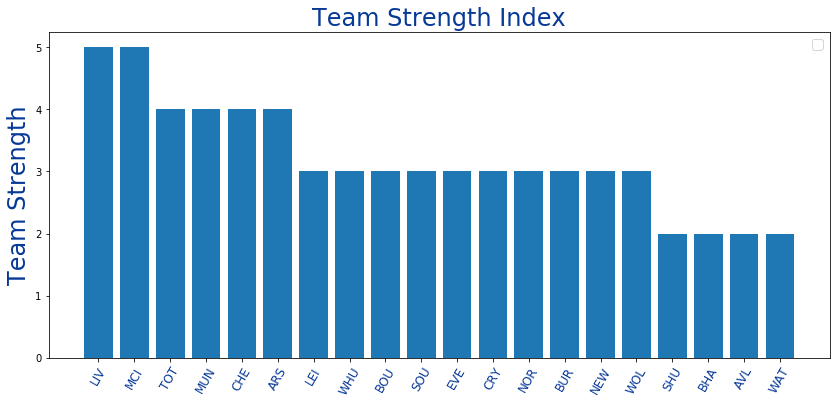

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

sorted_data = sorted(scores.items(), key = lambda x: x[1], reverse = True)

Team = [item[0] for item in sorted_data]
strength = [item[1] for item in sorted_data]

plt.bar(Team, strength)
plt.ylabel('Team Strength', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Team Strength Index', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

In [39]:
schedule_df.columns

Index(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
       'Man City', 'Man Utd', 'Newcastle', 'Norwich', 'Sheffield Utd',
       'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves'],
      dtype='object')

In [42]:
schedule_df.head(10)

,Arsenal,Aston Villa,Bournemouth,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Leicester,Liverpool,Man City,Man Utd,Newcastle,Norwich,Sheffield Utd,Southampton,Spurs,Watford,West Ham,Wolves
Gameweek,,,,,,,,,,,,,,,,,,,,
0,NEW,TOT,SHU,WAT,SOU,MUN,EVE,CRY,WOL,NOR,WHU,CHE,ARS,LIV,BOU,BUR,AVL,BHA,MCI,LEI
1,BUR,BOU,AVL,WHU,ARS,LEI,SHU,WAT,CHE,SOU,TOT,WOL,NOR,NEW,CRY,LIV,MCI,EVE,BHA,MUN
2,LIV,EVE,MCI,SOU,WOL,NOR,MUN,AVL,SHU,ARS,BOU,CRY,TOT,CHE,LEI,BHA,NEW,WHU,WAT,BUR
3,TOT,CRY,LEI,MCI,LIV,SHU,AVL,WOL,BOU,BUR,BHA,SOU,WAT,WHU,CHE,MUN,ARS,NEW,NOR,EVE
4,WAT,WHU,EVE,BUR,BHA,WOL,TOT,BOU,MUN,NEW,NOR,LEI,LIV,MCI,SOU,SHU,CRY,ARS,AVL,CHE
5,AVL,ARS,SOU,NEW,NOR,LIV,WOL,SHU,TOT,CHE,WAT,WHU,BHA,BUR,EVE,BOU,LEI,MCI,MUN,CRY
6,MUN,BUR,WHU,CHE,AVL,BHA,NOR,MCI,NEW,SHU,EVE,ARS,LEI,CRY,LIV,TOT,SOU,WOL,BOU,WAT
7,BOU,NOR,ARS,TOT,EVE,SOU,WHU,BUR,LIV,LEI,WOL,NEW,MUN,AVL,WAT,CHE,BHA,SHU,CRY,MCI
8,SHU,BHA,NOR,AVL,LEI,NEW,MCI,WHU,BUR,MUN,CRY,LIV,CHE,BOU,ARS,WOL,WAT,TOT,EVE,SOU


In [43]:
def avg_FDR(week = gameweek, periods = next_n_games):
    dic = {}
    for team in schedule_df.columns:
        oponents = schedule_df[team][(week-1):(week+periods)]
        avg_FDR = round(sum([scores[oponent] for oponent in oponents])/len(oponents), 2)
        dic[team] = avg_FDR
    return dic

In [44]:
calculate_FDR = avg_FDR()

In [45]:
sorted_FDR = sorted(calculate_FDR.items(), key=lambda x: x[1], reverse=True)

In [46]:
sorted_FDR

[('Leicester', 4.0),
 ('Brighton', 3.67),
 ('Southampton', 3.67),
 ('Aston Villa', 3.33),
 ('Bournemouth', 3.33),
 ('Chelsea', 3.33),
 ('Everton', 3.33),
 ('Man Utd', 3.33),
 ('Sheffield Utd', 3.33),
 ('Watford', 3.33),
 ('West Ham', 3.33),
 ('Wolves', 3.33),
 ('Arsenal', 3.0),
 ('Crystal Palace', 3.0),
 ('Liverpool', 3.0),
 ('Newcastle', 3.0),
 ('Burnley', 2.67),
 ('Man City', 2.67),
 ('Norwich', 2.67),
 ('Spurs', 2.67)]

<function matplotlib.pyplot.show(*args, **kw)>

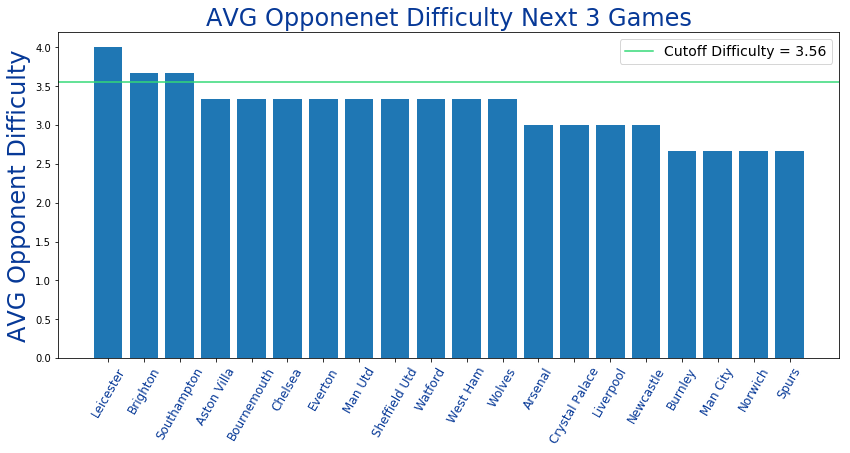

In [47]:
rcParams['figure.figsize'] = 14, 6

Team = [item[0] for item in sorted_FDR]
FDR = [item[1] for item in sorted_FDR]
cutoff = 3.56

plt.bar(Team, FDR)
plt.axhline(y=cutoff, linestyle='-', color='#33D977', label='Cutoff Difficulty = ' + str(cutoff))
plt.ylabel('AVG Opponent Difficulty', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('AVG Opponenet Difficulty Next ' + str(next_n_games +1) + ' Games', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Clean final list of available players by FDR score <= 3.56 and status = 'available'

In [48]:
player_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
355,9,7.1,442,Teemu Pukki,Forward,9.95,0,6.90,available,45,Norwich,49,2752704,376346
159,9,7.3,327,Tammy Abraham,Forward,11.52,0,5.75,available,8,Chelsea,42,1574029,231001
364,2,4.9,437,Todd Cantwell,Midfielder,5.55,0,5.51,available,45,Norwich,27,1625115,206302
414,3,4.5,450,Angus Gunn,Goalkeeper,4.79,0,5.33,available,20,Southampton,24,145315,29720
400,6,5.1,450,Jannik Vestergaard,Defender,5.39,0,5.29,available,20,Southampton,27,362645,34949


In [49]:
player_df.shape

(539, 14)

In [50]:
clean_df = player_df[player_df.status == 'available']

In [51]:
clean_df.status.value_counts()

available    405
Name: status, dtype: int64

## Remove teams with FDR scores > 3.56 from DF - optional

In [52]:
teams_low_FDR = [key for (key,value) in calculate_FDR.items() if value <= 3.56]

In [53]:
teams_low_FDR

['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Liverpool',
 'Man City',
 'Man Utd',
 'Newcastle',
 'Norwich',
 'Sheffield Utd',
 'Spurs',
 'Watford',
 'West Ham',
 'Wolves']

In [54]:
clean_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
355,9,7.1,442,Teemu Pukki,Forward,9.95,0,6.90,available,45,Norwich,49,2752704,376346
159,9,7.3,327,Tammy Abraham,Forward,11.52,0,5.75,available,8,Chelsea,42,1574029,231001
364,2,4.9,437,Todd Cantwell,Midfielder,5.55,0,5.51,available,45,Norwich,27,1625115,206302
414,3,4.5,450,Angus Gunn,Goalkeeper,4.79,0,5.33,available,20,Southampton,24,145315,29720
400,6,5.1,450,Jannik Vestergaard,Defender,5.39,0,5.29,available,20,Southampton,27,362645,34949


In [55]:
final_df = clean_df.loc[clean_df.team_name.isin(teams_low_FDR)]

In [56]:
final_df.head(15)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
355,9,7.1,442,Teemu Pukki,Forward,9.95,0,6.90,available,45,Norwich,49,2752704,376346
159,9,7.3,327,Tammy Abraham,Forward,11.52,0,5.75,available,8,Chelsea,42,1574029,231001
364,2,4.9,437,Todd Cantwell,Midfielder,5.55,0,5.51,available,45,Norwich,27,1625115,206302
382,4,4.3,418,John Lundstram,Defender,4.30,0,4.65,available,49,Sheffield Utd,20,1200989,162504
500,3,5.0,450,Lukasz Fabianski,Goalkeeper,4.59,0,4.60,available,21,West Ham,23,63683,90797
49,3,4.6,450,Tyrone Mings,Defender,4.19,0,4.57,available,7,Aston Villa,21,327701,92004
51,4,4.5,450,Bjorn Engels,Defender,3.99,0,4.44,available,7,Aston Villa,20,48223,13657
122,4,6.7,412,Ashley Barnes,Forward,6.32,0,4.33,available,90,Burnley,29,907653,425187
303,4,5.6,450,David de Gea,Goalkeeper,4.79,0,4.29,available,1,Man Utd,24,617681,356553
448,2,6.1,381,Erik Lamela,Midfielder,6.13,0,4.26,available,6,Spurs,26,314397,119297


In [57]:
clean_players = final_df.to_dict('records')

In [58]:
clean_players[:2]

[{'bonus': 9,
  'cost': 7.1,
  'minutes': 442,
  'name': 'Teemu Pukki',
  'position': 'Forward',
  'pts_per_90min': 9.95,
  'red_cards': 0,
  'roi': 6.9,
  'status': 'available',
  'team_code': 45,
  'team_name': 'Norwich',
  'total_points': 49,
  'transfers_in': 2752704,
  'transfers_out': 376346},
 {'bonus': 9,
  'cost': 7.3,
  'minutes': 327,
  'name': 'Tammy Abraham',
  'position': 'Forward',
  'pts_per_90min': 11.52,
  'red_cards': 0,
  'roi': 5.75,
  'status': 'available',
  'team_code': 8,
  'team_name': 'Chelsea',
  'total_points': 42,
  'transfers_in': 1574029,
  'transfers_out': 231001}]

## Get list of players by ROI, Total Points and Points Per 90 min

In [59]:
players_roi = sorted(clean_players, key = lambda x: x['roi'], reverse = True)

In [60]:
players_roi[:3]

[{'bonus': 9,
  'cost': 7.1,
  'minutes': 442,
  'name': 'Teemu Pukki',
  'position': 'Forward',
  'pts_per_90min': 9.95,
  'red_cards': 0,
  'roi': 6.9,
  'status': 'available',
  'team_code': 45,
  'team_name': 'Norwich',
  'total_points': 49,
  'transfers_in': 2752704,
  'transfers_out': 376346},
 {'bonus': 9,
  'cost': 7.3,
  'minutes': 327,
  'name': 'Tammy Abraham',
  'position': 'Forward',
  'pts_per_90min': 11.52,
  'red_cards': 0,
  'roi': 5.75,
  'status': 'available',
  'team_code': 8,
  'team_name': 'Chelsea',
  'total_points': 42,
  'transfers_in': 1574029,
  'transfers_out': 231001},
 {'bonus': 2,
  'cost': 4.9,
  'minutes': 437,
  'name': 'Todd Cantwell',
  'position': 'Midfielder',
  'pts_per_90min': 5.55,
  'red_cards': 0,
  'roi': 5.51,
  'status': 'available',
  'team_code': 45,
  'team_name': 'Norwich',
  'total_points': 27,
  'transfers_in': 1625115,
  'transfers_out': 206302}]

### Total Points

In [61]:
players_max_pts = sorted(players_roi, key = lambda x: x['total_points'], reverse = True)

In [62]:
players_max_pts[:3]

[{'bonus': 9,
  'cost': 7.1,
  'minutes': 442,
  'name': 'Teemu Pukki',
  'position': 'Forward',
  'pts_per_90min': 9.95,
  'red_cards': 0,
  'roi': 6.9,
  'status': 'available',
  'team_code': 45,
  'team_name': 'Norwich',
  'total_points': 49,
  'transfers_in': 2752704,
  'transfers_out': 376346},
 {'bonus': 6,
  'cost': 12.1,
  'minutes': 356,
  'name': 'Sergio Agüero',
  'position': 'Forward',
  'pts_per_90min': 11.6,
  'red_cards': 0,
  'roi': 3.8,
  'status': 'available',
  'team_code': 43,
  'team_name': 'Man City',
  'total_points': 46,
  'transfers_in': 849381,
  'transfers_out': 333911},
 {'bonus': 7,
  'cost': 12.5,
  'minutes': 438,
  'name': 'Mohamed Salah',
  'position': 'Midfielder',
  'pts_per_90min': 9.23,
  'red_cards': 0,
  'roi': 3.6,
  'status': 'available',
  'team_code': 14,
  'team_name': 'Liverpool',
  'total_points': 45,
  'transfers_in': 657982,
  'transfers_out': 665024}]

### Per 90 mins played

In [63]:
players_90min = sorted(players_roi, key = lambda x: x['pts_per_90min'], reverse = True)

#define filter of minimum time played
min_min = min_min
players_90min = [player for player in players_90min if player['minutes'] >= min_min]

In [64]:
players_90min[:3]

[{'bonus': 6,
  'cost': 12.1,
  'minutes': 356,
  'name': 'Sergio Agüero',
  'position': 'Forward',
  'pts_per_90min': 11.6,
  'red_cards': 0,
  'roi': 3.8,
  'status': 'available',
  'team_code': 43,
  'team_name': 'Man City',
  'total_points': 46,
  'transfers_in': 849381,
  'transfers_out': 333911},
 {'bonus': 9,
  'cost': 7.3,
  'minutes': 327,
  'name': 'Tammy Abraham',
  'position': 'Forward',
  'pts_per_90min': 11.52,
  'red_cards': 0,
  'roi': 5.75,
  'status': 'available',
  'team_code': 8,
  'team_name': 'Chelsea',
  'total_points': 42,
  'transfers_in': 1574029,
  'transfers_out': 231001},
 {'bonus': 6,
  'cost': 11.6,
  'minutes': 356,
  'name': 'Sadio Mané',
  'position': 'Midfielder',
  'pts_per_90min': 10.08,
  'red_cards': 0,
  'roi': 3.45,
  'status': 'available',
  'team_code': 14,
  'team_name': 'Liverpool',
  'total_points': 40,
  'transfers_in': 786767,
  'transfers_out': 401911}]

### Create player lists by position and metric we want to select by

In [65]:
GK_roi = [item for item in players_roi if item['position'] == 'Goalkeeper']
DF_roi = [item for item in players_roi if item['position'] == 'Defender']
MD_roi = [item for item in players_roi if item['position'] == 'Midfielder']
ST_roi = [item for item in players_roi if item['position'] == 'Forward']

In [66]:
GK_pts = [item for item in players_max_pts if item['position'] == 'Goalkeeper']
DF_pts = [item for item in players_max_pts if item['position'] == 'Defender']
MD_pts = [item for item in players_max_pts if item['position'] == 'Midfielder']
ST_pts = [item for item in players_max_pts if item['position'] == 'Forward']

In [67]:
GK_90min = [item for item in players_90min if item['position'] == 'Goalkeeper']
DF_90min = [item for item in players_90min if item['position'] == 'Defender']
MD_90min = [item for item in players_90min if item['position'] == 'Midfielder']
ST_90min = [item for item in players_90min if item['position'] == 'Forward']

## Start by selecting top GKs by ROI

In [68]:
#define money team as empty list and list that tracks count of players selectd per team
money_team = []
players_selected = []
teams_selected = []

#Instantiate initial count per position
#Current players selected for each position
DF_curr = 0
MD_curr = 0 
ST_curr = 0

GK_budget = budget*GK_coef
print(GK_budget)

for item in GK_roi:
    if item['cost'] <= 5.5 and item['cost'] <= GK_budget:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        GK_budget -= item['cost']
        print('Player Selected: ' + item['name'])
        print('GK budget left: ' + str(GK_budget))

print(players_selected)
print(teams_selected)

9.5
Player Selected: Lukasz Fabianski
GK budget left: 4.5
Player Selected: Dean Henderson
GK budget left: 0.0
['Lukasz Fabianski', 'Dean Henderson']
['West Ham', 'Sheffield Utd']


## Select Top player by points from DF, MD, ST

In [69]:
DF_budget = budget*DF_coef + GK_budget
MD_budget = budget*MD_coef
ST_budget = budget*ST_coef

print(DF_budget, MD_budget, ST_budget)

#Select Top Defender
money_team.append(DF_pts[0])
players_selected.append(DF_pts[0]['name'])
teams_selected.append(DF_pts[0]['team_name'])
DF_budget -= DF_pts[0]['cost']
DF_curr += 1
print('Player Selected: ' + DF_pts[0]['name'])
print('DF budget left: ' + str(DF_budget))

#Select Top Midfielder
money_team.append(MD_pts[0])
players_selected.append(MD_pts[0]['name'])
teams_selected.append(MD_pts[0]['team_name'])
MD_budget -= MD_pts[0]['cost']
MD_curr += 1
print('Player Selected: ' + MD_pts[0]['name'])
print('MD budget left: ' + str(MD_budget))


print(players_selected)
print(teams_selected)

28.499999999999996 36.0 26.0
Player Selected: Trent Alexander-Arnold
DF budget left: 21.4
Player Selected: Mohamed Salah
MD budget left: 23.5
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool']


In [ ]:
ST_pts[:3]

In [70]:
#Select Top Striker

for item in ST_pts[:3]:
    if teams_selected.count(item['team_name']) < 3 and len(money_team) == 4:
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
    break

print(len(money_team))
print(players_selected)
print(teams_selected)

Player Selected: Teemu Pukki
ST budget left: 18.9
5
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah', 'Teemu Pukki']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool', 'Norwich']


In [71]:
print(DF_curr, MD_curr, ST_curr)

1 1 1


In [72]:
print(DF, MD, ST)

3 4 3


### Fill rest of team with top ROI players

In [73]:
for item in DF_roi:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < DF_budget and DF_curr < DF:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        DF_budget -= item['cost']
        DF_curr += 1
        print('Player Selected: ' + item['name'])
        print('DF budget left: ' + str(DF_budget))
        print('# of DFs selected: ' + str(DF_curr))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and DF_max != DF_curr and item['cost'] <= DF_budget / (DF_max - DF_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            DF_budget -= item['cost']
            DF_curr += 1
            print('Player Selected: ' + item['name'])
            print('DF budget left: ' + str(DF_budget))
            print('# of DFs selected: ' + str(DF_curr))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected)                       

Player Selected: John Lundstram
DF budget left: 17.099999999999998
# of DFs selected: 2
Player Selected: Tyrone Mings
DF budget left: 12.499999999999998
# of DFs selected: 3
Player Selected: Bjorn Engels
DF budget left: 7.999999999999998
# of DFs selected: 4
Player Selected: Erik Pieters
DF budget left: 3.299999999999998
# of DFs selected: 5
9
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah', 'Teemu Pukki', 'John Lundstram', 'Tyrone Mings', 'Bjorn Engels', 'Erik Pieters']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool', 'Norwich', 'Sheffield Utd', 'Aston Villa', 'Aston Villa', 'Burnley']


## Fill MD position

In [74]:
#move leftover DF budget to MD budget
MD_budget += DF_budget

for item in MD_roi:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < MD_budget and MD_curr < MD:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        MD_budget -= item['cost']
        MD_curr += 1
        print('Player Selected: ' + item['name'])
        print('MD budget left: ' + str(MD_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and MD_max != MD_curr and item['cost'] <= MD_budget / (MD_max - MD_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            MD_budget -= item['cost']
            MD_curr += 1
            print('Player Selected: ' + item['name'])
            print('MD budget left: ' + str(MD_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Todd Cantwell
MD budget left: 21.9
Player Selected: Erik Lamela
MD budget left: 15.799999999999999
Player Selected: Emiliano Buendía
MD budget left: 9.799999999999999
Player Selected: Will Hughes
MD budget left: 4.299999999999999
13
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah', 'Teemu Pukki', 'John Lundstram', 'Tyrone Mings', 'Bjorn Engels', 'Erik Pieters', 'Todd Cantwell', 'Erik Lamela', 'Emiliano Buendía', 'Will Hughes']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool', 'Norwich', 'Sheffield Utd', 'Aston Villa', 'Aston Villa', 'Burnley', 'Norwich', 'Spurs', 'Norwich', 'Watford']


## Fill ST position

In [75]:
#move leftover MD budget to ST budget
ST_budget += MD_budget

for item in ST_roi:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < ST_budget and ST_curr < ST:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        ST_budget -= item['cost']
        ST_curr += 1
        print('Player Selected: ' + item['name'])
        print('ST budget left: ' + str(ST_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and ST_max != ST_curr and item['cost'] <= ST_budget / (ST_max - ST_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Tammy Abraham
ST budget left: 15.899999999999995
Player Selected: Ashley Barnes
ST budget left: 9.199999999999996
15
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah', 'Teemu Pukki', 'John Lundstram', 'Tyrone Mings', 'Bjorn Engels', 'Erik Pieters', 'Todd Cantwell', 'Erik Lamela', 'Emiliano Buendía', 'Will Hughes', 'Tammy Abraham', 'Ashley Barnes']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool', 'Norwich', 'Sheffield Utd', 'Aston Villa', 'Aston Villa', 'Burnley', 'Norwich', 'Spurs', 'Norwich', 'Watford', 'Chelsea', 'Burnley']


In [76]:
money_df = pd.DataFrame(money_team)

In [77]:
money_df

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,3,5.0,450,Lukasz Fabianski,Goalkeeper,4.59,0,4.60,available,21,West Ham,23,63683,90797
1,2,4.5,450,Dean Henderson,Goalkeeper,3.59,0,4.00,available,49,Sheffield Utd,18,80451,38740
2,2,7.1,450,Trent Alexander-Arnold,Defender,4.79,0,3.38,available,14,Liverpool,24,572096,371244
3,7,12.5,438,Mohamed Salah,Midfielder,9.23,0,3.60,available,14,Liverpool,45,657982,665024
4,9,7.1,442,Teemu Pukki,Forward,9.95,0,6.90,available,45,Norwich,49,2752704,376346
5,4,4.3,418,John Lundstram,Defender,4.30,0,4.65,available,49,Sheffield Utd,20,1200989,162504
6,3,4.6,450,Tyrone Mings,Defender,4.19,0,4.57,available,7,Aston Villa,21,327701,92004
7,4,4.5,450,Bjorn Engels,Defender,3.99,0,4.44,available,7,Aston Villa,20,48223,13657
8,2,4.7,450,Erik Pieters,Defender,3.99,0,4.26,available,90,Burnley,20,674253,176947
9,2,4.9,437,Todd Cantwell,Midfielder,5.55,0,5.51,available,45,Norwich,27,1625115,206302


<function matplotlib.pyplot.show(*args, **kw)>

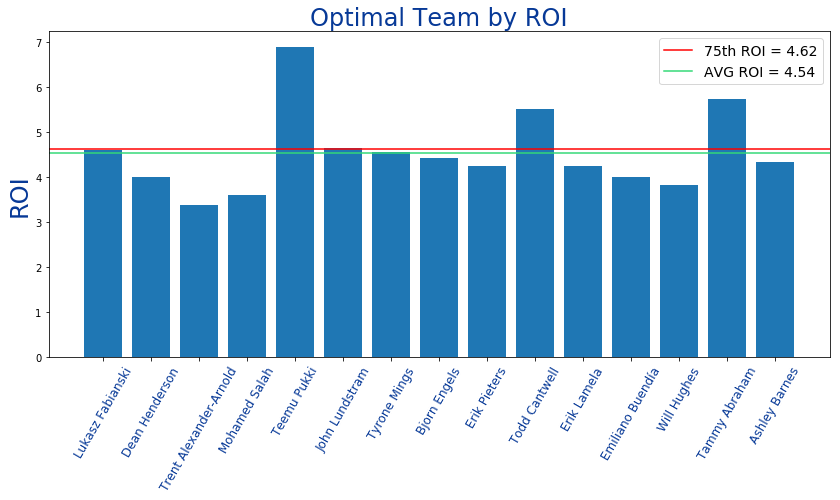

In [78]:
money_x = money_df.roi
money_y = money_df.name
ST_75th = round(money_df.describe().roi['75%'], 2)
ST_AVG = round(money_df.describe().roi['mean'], 2)

plt.bar(money_y, money_x)
plt.axhline(y=ST_75th, color='r', linestyle='-', label='75th ROI = ' + str(ST_75th))
plt.axhline(y=ST_AVG, color='#33D977', linestyle='-', label='AVG ROI = ' + str(ST_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Optimal Team by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

### Top 10 ROI players by position

In [79]:
GK_df = pd.DataFrame(GK_roi)
GK_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,3,5.0,450,Lukasz Fabianski,Goalkeeper,4.59,0,4.60,available,21,West Ham,23,63683,90797
1,4,5.6,450,David de Gea,Goalkeeper,4.79,0,4.29,available,1,Man Utd,24,617681,356553
2,2,4.5,450,Dean Henderson,Goalkeeper,3.59,0,4.00,available,49,Sheffield Utd,18,80451,38740
3,0,4.5,450,Tom Heaton,Goalkeeper,3.59,0,4.00,available,7,Aston Villa,18,154316,123817
4,2,5.1,450,Rui Pedro dos Santos Patrício,Goalkeeper,3.99,0,3.92,available,39,Wolves,20,364281,143516
5,1,4.6,450,Nick Pope,Goalkeeper,3.59,0,3.91,available,90,Burnley,18,578298,151611
6,0,5.5,450,Hugo Lloris,Goalkeeper,3.79,0,3.45,available,6,Spurs,19,164139,208793
7,1,5.6,450,Jordan Pickford,Goalkeeper,3.59,0,3.21,available,11,Everton,18,309735,205757
8,1,5.0,450,Bernd Leno,Goalkeeper,3.19,0,3.20,available,3,Arsenal,16,197489,171987
9,0,4.6,411,Adrián San Miguel del Castillo,Goalkeeper,3.06,0,3.04,available,14,Liverpool,14,462372,127567


In [80]:
DF_df = pd.DataFrame(DF_roi)
DF_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,4,4.3,418,John Lundstram,Defender,4.30,0,4.65,available,49,Sheffield Utd,20,1200989,162504
1,3,4.6,450,Tyrone Mings,Defender,4.19,0,4.57,available,7,Aston Villa,21,327701,92004
2,4,4.5,450,Bjorn Engels,Defender,3.99,0,4.44,available,7,Aston Villa,20,48223,13657
3,2,4.7,450,Erik Pieters,Defender,3.99,0,4.26,available,90,Burnley,20,674253,176947
4,2,4.5,450,Issa Diop,Defender,3.59,0,4.00,available,21,West Ham,18,56057,78934
5,2,5.6,450,Patrick van Aanholt,Defender,4.39,0,3.93,available,31,Crystal Palace,22,492329,192294
6,3,5.1,450,Ainsley Maitland-Niles,Defender,3.99,0,3.92,available,3,Arsenal,20,483575,191357
7,2,4.5,450,Ryan Fredericks,Defender,3.39,0,3.78,available,21,West Ham,17,15762,10840
8,2,4.5,450,Joel Ward,Defender,3.39,0,3.78,available,31,Crystal Palace,17,146424,41632
9,3,4.5,450,George Baldock,Defender,3.39,0,3.78,available,49,Sheffield Utd,17,39181,13687


In [81]:
MD_df = pd.DataFrame(MD_roi)
MD_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,2,4.9,437,Todd Cantwell,Midfielder,5.55,0,5.51,available,45,Norwich,27,1625115,206302
1,2,6.1,381,Erik Lamela,Midfielder,6.13,0,4.26,available,6,Spurs,26,314397,119297
2,3,6.0,442,Emiliano Buendía,Midfielder,4.88,0,4.00,available,45,Norwich,24,83972,34842
3,3,5.5,361,Will Hughes,Midfielder,5.22,0,3.82,available,57,Watford,21,45638,18051
4,6,9.8,359,Kevin De Bruyne,Midfielder,9.25,0,3.78,available,43,Man City,37,1490844,323114
5,3,5.0,435,Scott McTominay,Midfielder,3.72,0,3.60,available,1,Man Utd,18,72723,39136
6,7,12.5,438,Mohamed Salah,Midfielder,9.23,0,3.60,available,14,Liverpool,45,657982,665024
7,0,5.6,450,John McGinn,Midfielder,3.99,0,3.57,available,7,Aston Villa,20,450478,219721
8,2,4.6,267,Douglas Luiz Soares de Paulo,Midfielder,5.37,0,3.48,available,7,Aston Villa,16,378482,128267
9,6,11.6,356,Sadio Mané,Midfielder,10.08,0,3.45,available,14,Liverpool,40,786767,401911


In [82]:
ST_df = pd.DataFrame(ST_roi)
ST_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,9,7.1,442,Teemu Pukki,Forward,9.95,0,6.90,available,45,Norwich,49,2752704,376346
1,9,7.3,327,Tammy Abraham,Forward,11.52,0,5.75,available,8,Chelsea,42,1574029,231001
2,4,6.7,412,Ashley Barnes,Forward,6.32,0,4.33,available,90,Burnley,29,907653,425187
3,3,7.8,427,Callum Wilson,Forward,6.94,0,4.23,available,91,Bournemouth,33,156970,673755
4,6,5.1,293,Jordan Ayew,Forward,6.43,0,4.12,available,31,Crystal Palace,21,528420,220752
5,6,12.1,356,Sergio Agüero,Forward,11.60,0,3.80,available,43,Man City,46,849381,333911
6,6,9.5,397,Roberto Firmino,Forward,7.91,0,3.68,available,14,Liverpool,35,392962,335809
7,7,11.0,450,Pierre-Emerick Aubameyang,Forward,7.78,0,3.55,available,3,Arsenal,39,447546,697271
8,7,8.5,443,Marcus Rashford,Forward,6.08,0,3.53,available,1,Man Utd,30,801751,842457
9,2,6.3,438,Joshua King,Forward,4.51,0,3.49,available,91,Bournemouth,22,197503,831235


## Define Clean df for graphing purposes

In [83]:
clean_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
355,9,7.1,442,Teemu Pukki,Forward,9.95,0,6.90,available,45,Norwich,49,2752704,376346
159,9,7.3,327,Tammy Abraham,Forward,11.52,0,5.75,available,8,Chelsea,42,1574029,231001
364,2,4.9,437,Todd Cantwell,Midfielder,5.55,0,5.51,available,45,Norwich,27,1625115,206302
414,3,4.5,450,Angus Gunn,Goalkeeper,4.79,0,5.33,available,20,Southampton,24,145315,29720
400,6,5.1,450,Jannik Vestergaard,Defender,5.39,0,5.29,available,20,Southampton,27,362645,34949


In [84]:
graph_roi = []
for row, player in clean_df.iterrows():
    playa = dict(name = player['name'], position = player.position, team=player.team_name, cost = player.cost, points = player.total_points, minutes = player.minutes, ROI = player.roi, pts_per_90min = player.pts_per_90min)
    graph_roi.append(playa)

In [85]:
graph_roi[:3]

[{'name': 'Teemu Pukki',
  'position': 'Forward',
  'team': 'Norwich',
  'cost': 7.1,
  'points': 49,
  'minutes': 442,
  'ROI': 6.9,
  'pts_per_90min': 9.95},
 {'name': 'Tammy Abraham',
  'position': 'Forward',
  'team': 'Chelsea',
  'cost': 7.3,
  'points': 42,
  'minutes': 327,
  'ROI': 5.75,
  'pts_per_90min': 11.52},
 {'name': 'Todd Cantwell',
  'position': 'Midfielder',
  'team': 'Norwich',
  'cost': 4.9,
  'points': 27,
  'minutes': 437,
  'ROI': 5.51,
  'pts_per_90min': 5.55}]

### Graph by ROI

In [86]:
GK_graph = clean_df[clean_df['position'] == 'Goalkeeper']
DF_graph = clean_df[clean_df['position'] == 'Defender']
MD_graph = clean_df[clean_df['position'] == 'Midfielder']
ST_graph = clean_df[clean_df['position'] == 'Forward']

### Graph by 90_min Stat

In [87]:
sorted_players_90min = sorted(graph_roi, key = lambda x: x['pts_per_90min'], reverse = True)

#define filter of minimum time played
min_min = min_min
sorted_players_90min = [player for player in sorted_players_90min if player['minutes'] >= min_min]

In [88]:
sorted_players_90min[:3]

[{'name': 'Sergio Agüero',
  'position': 'Forward',
  'team': 'Man City',
  'cost': 12.1,
  'points': 46,
  'minutes': 356,
  'ROI': 3.8,
  'pts_per_90min': 11.6},
 {'name': 'Tammy Abraham',
  'position': 'Forward',
  'team': 'Chelsea',
  'cost': 7.3,
  'points': 42,
  'minutes': 327,
  'ROI': 5.75,
  'pts_per_90min': 11.52},
 {'name': 'Sadio Mané',
  'position': 'Midfielder',
  'team': 'Liverpool',
  'cost': 11.6,
  'points': 40,
  'minutes': 356,
  'ROI': 3.45,
  'pts_per_90min': 10.08}]

In [89]:
df_90min = pd.DataFrame(sorted_players_90min)

In [90]:
df_90min.head()

,ROI,cost,minutes,name,points,position,pts_per_90min,team
0,3.80,12.1,356,Sergio Agüero,46,Forward,11.60,Man City
1,5.75,7.3,327,Tammy Abraham,42,Forward,11.52,Chelsea
2,3.45,11.6,356,Sadio Mané,40,Midfielder,10.08,Liverpool
3,6.90,7.1,442,Teemu Pukki,49,Forward,9.95,Norwich
4,3.78,9.8,359,Kevin De Bruyne,37,Midfielder,9.25,Man City


In [91]:
GK_90min_graph = df_90min[df_90min['position'] == 'Goalkeeper']
DF_90min_graph = df_90min[df_90min['position'] == 'Defender']
MD_90min_graph = df_90min[df_90min['position'] == 'Midfielder']
ST_90min_graph = df_90min[df_90min['position'] == 'Forward']

In [92]:
GK_90min_graph.head()

,ROI,cost,minutes,name,points,position,pts_per_90min,team
46,5.33,4.5,450,Angus Gunn,24,Goalkeeper,4.79,Southampton
47,4.29,5.6,450,David de Gea,24,Goalkeeper,4.79,Man Utd
56,4.60,5.0,450,Lukasz Fabianski,23,Goalkeeper,4.59,West Ham
85,3.92,5.1,450,Rui Pedro dos Santos Patrício,20,Goalkeeper,3.99,Wolves
94,3.45,5.5,450,Hugo Lloris,19,Goalkeeper,3.79,Spurs


In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

## Top 10 Keepers ROI

<function matplotlib.pyplot.show(*args, **kw)>

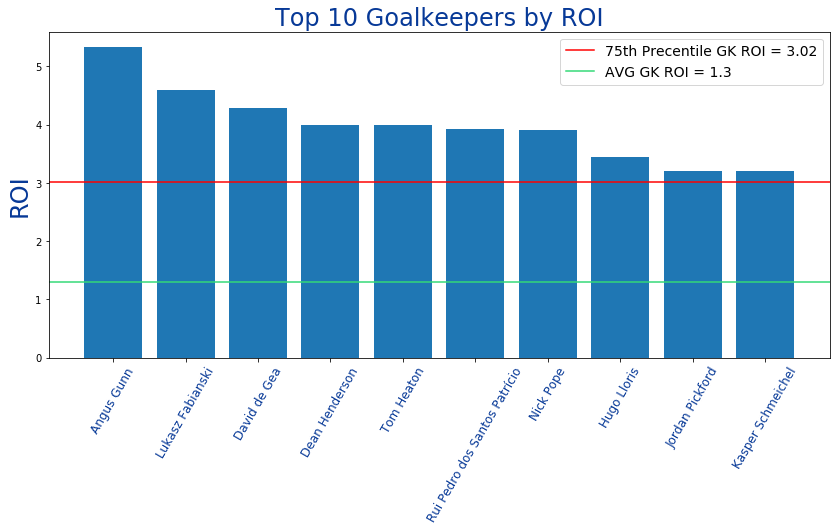

In [94]:
GK_x = GK_graph[:10].roi
GK_y = GK_graph[:10].name
GK_75th = round(GK_graph.describe().roi['75%'], 2)
GK_AVG = round(GK_graph.describe().roi['mean'], 2)

plt.bar(GK_y, GK_x)
plt.axhline(y=GK_75th, color='r', linestyle='-', label='75th Precentile GK ROI = ' + str(GK_75th))
plt.axhline(y=GK_AVG, color='#33D977', linestyle='-', label='AVG GK ROI = ' + str(GK_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Goalkeepers by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Keepers 90_min

<function matplotlib.pyplot.show(*args, **kw)>

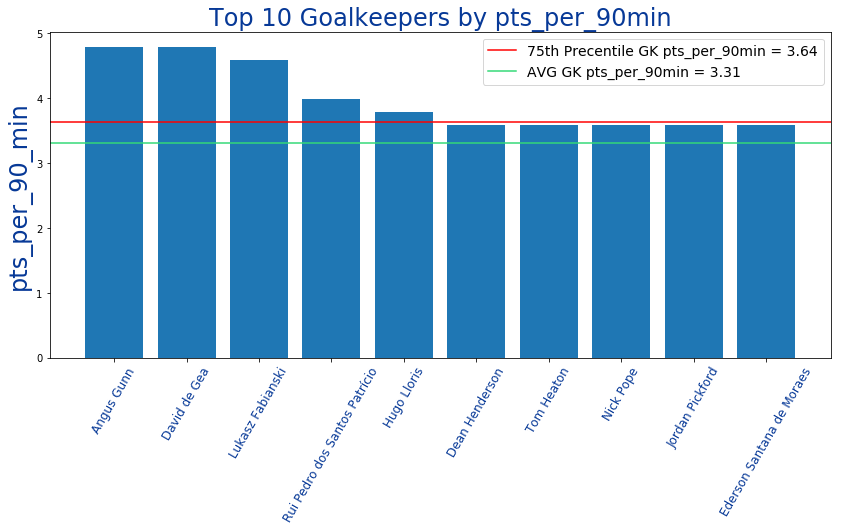

In [95]:
GK_x = GK_90min_graph[:10].pts_per_90min
GK_y = GK_90min_graph[:10].name
GK_75th = round(GK_90min_graph.describe().pts_per_90min['75%'], 2)
GK_AVG = round(GK_90min_graph.describe().pts_per_90min['mean'], 2)

plt.bar(GK_y, GK_x)
plt.axhline(y=GK_75th, color='r', linestyle='-', label='75th Precentile GK pts_per_90min = ' + str(GK_75th))
plt.axhline(y=GK_AVG, color='#33D977', linestyle='-', label='AVG GK pts_per_90min = ' + str(GK_AVG))
plt.ylabel('pts_per_90_min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Goalkeepers by pts_per_90min', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Defenders

<function matplotlib.pyplot.show(*args, **kw)>

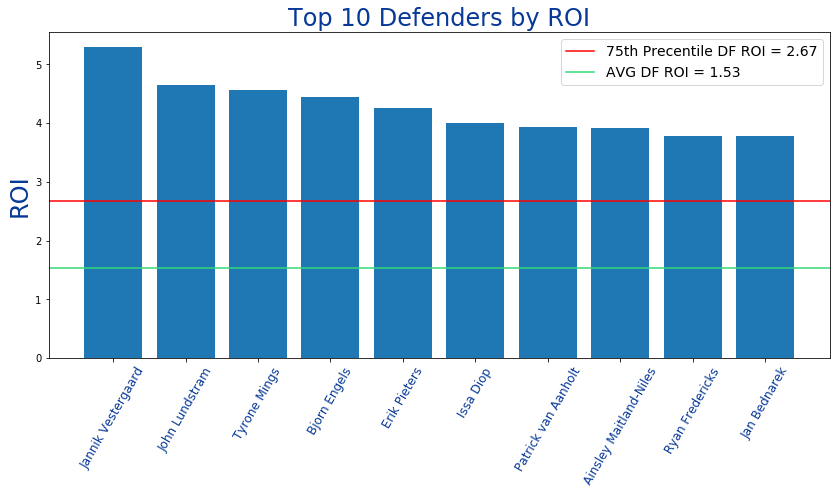

In [96]:
DF_x = DF_graph[:10].roi
DF_y = DF_graph[:10].name
DF_75th = round(DF_graph.describe().roi['75%'], 2)
DF_AVG = round(DF_graph.describe().roi['mean'], 2)

plt.bar(DF_y, DF_x)
plt.axhline(y=DF_75th, color='r', linestyle='-', label='75th Precentile DF ROI = ' + str(DF_75th))
plt.axhline(y=DF_AVG, color='#33D977', linestyle='-', label='AVG DF ROI = ' + str(DF_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Defenders by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Defenders 90min Stat

<function matplotlib.pyplot.show(*args, **kw)>

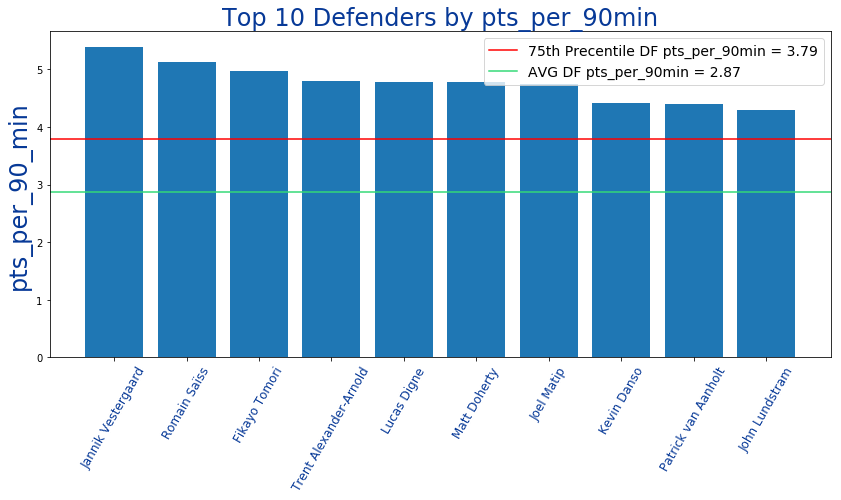

In [97]:
DF_x = DF_90min_graph[:10].pts_per_90min
DF_y = DF_90min_graph[:10].name
DF_75th = round(DF_90min_graph.describe().pts_per_90min['75%'], 2)
DF_AVG = round(DF_90min_graph.describe().pts_per_90min['mean'], 2)

plt.bar(DF_y, DF_x)
plt.axhline(y=DF_75th, color='r', linestyle='-', label='75th Precentile DF pts_per_90min = ' + str(DF_75th))
plt.axhline(y=DF_AVG, color='#33D977', linestyle='-', label='AVG DF pts_per_90min = ' + str(DF_AVG))
plt.ylabel('pts_per_90_min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Defenders by pts_per_90min', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Midfielders

<function matplotlib.pyplot.show(*args, **kw)>

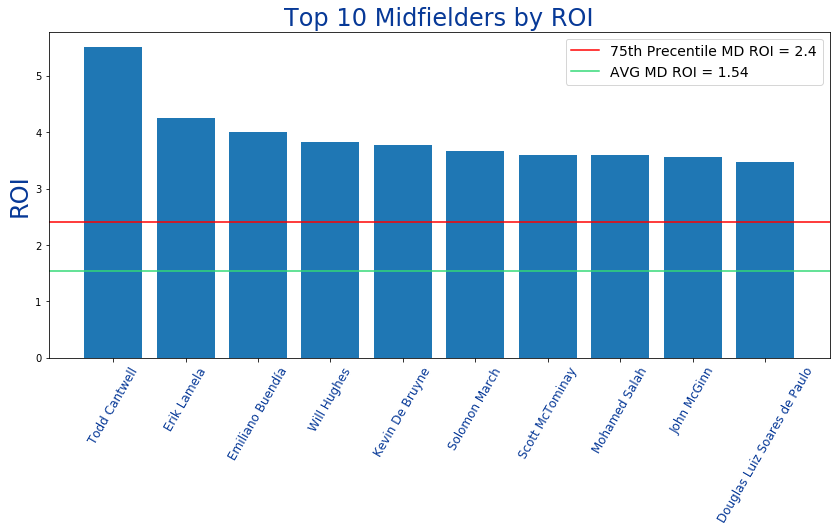

In [98]:
MD_x = MD_graph[:10].roi
MD_y = MD_graph[:10].name
MD_75th = round(MD_graph.describe().roi['75%'], 2)
MD_AVG = round(MD_graph.describe().roi['mean'], 2)

plt.bar(MD_y, MD_x)
plt.axhline(y=MD_75th, color='r', linestyle='-', label='75th Precentile MD ROI = ' + str(MD_75th))
plt.axhline(y=MD_AVG, color='#33D977', linestyle='-', label='AVG MD ROI = ' + str(MD_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Midfielders by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Midfielders 90min Stat

<function matplotlib.pyplot.show(*args, **kw)>

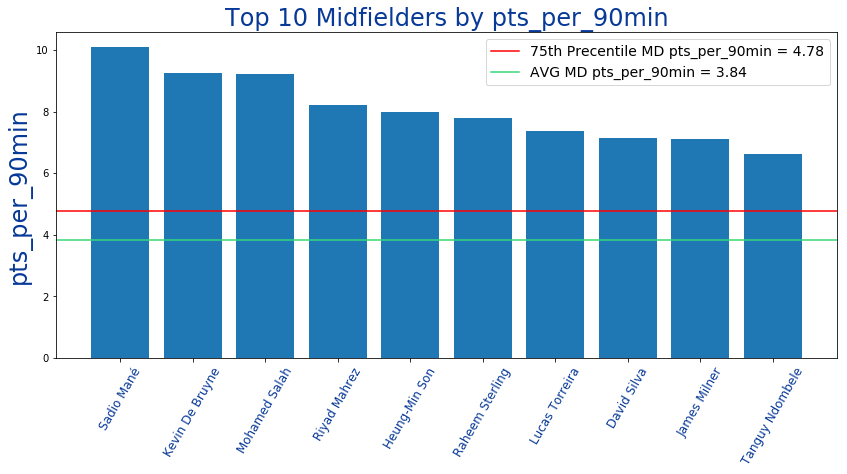

In [99]:
MD_x = MD_90min_graph[:10].pts_per_90min
MD_y = MD_90min_graph[:10].name
MD_75th = round(MD_90min_graph.describe().pts_per_90min['75%'], 2)
MD_AVG = round(MD_90min_graph.describe().pts_per_90min['mean'], 2)

plt.bar(MD_y, MD_x)
plt.axhline(y=MD_75th, color='r', linestyle='-', label='75th Precentile MD pts_per_90min = ' + str(MD_75th))
plt.axhline(y=MD_AVG, color='#33D977', linestyle='-', label='AVG MD pts_per_90min = ' + str(MD_AVG))
plt.ylabel('pts_per_90min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Midfielders by pts_per_90min', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Strikers

<function matplotlib.pyplot.show(*args, **kw)>

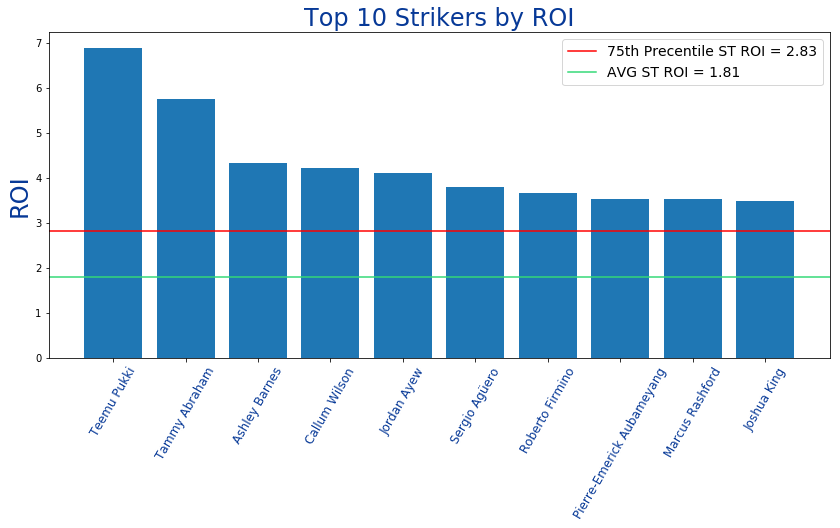

In [100]:
ST_x = ST_graph[:10].roi
ST_y = ST_graph[:10].name
ST_75th = round(ST_graph.describe().roi['75%'], 2)
ST_AVG = round(ST_graph.describe().roi['mean'], 2)

plt.bar(ST_y, ST_x)
plt.axhline(y=ST_75th, color='r', linestyle='-', label='75th Precentile ST ROI = ' + str(ST_75th))
plt.axhline(y=ST_AVG, color='#33D977', linestyle='-', label='AVG ST ROI = ' + str(ST_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Strikers by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Strikers 90min Stat

<function matplotlib.pyplot.show(*args, **kw)>

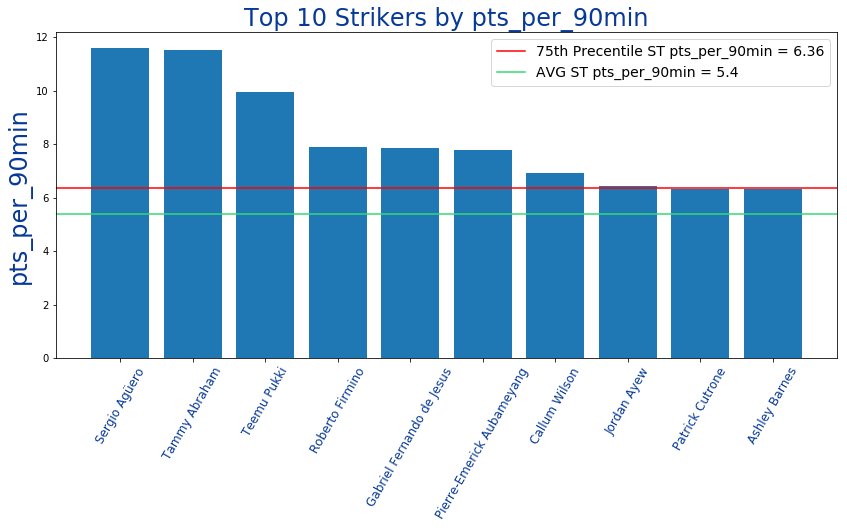

In [101]:
ST_x = ST_90min_graph[:10].pts_per_90min
ST_y = ST_90min_graph[:10].name
ST_75th = round(ST_90min_graph.describe().pts_per_90min['75%'], 2)
ST_AVG = round(ST_90min_graph.describe().pts_per_90min['mean'], 2)

plt.bar(ST_y, ST_x)
plt.axhline(y=ST_75th, color='r', linestyle='-', label='75th Precentile ST pts_per_90min = ' + str(ST_75th))
plt.axhline(y=ST_AVG, color='#33D977', linestyle='-', label='AVG ST pts_per_90min = ' + str(ST_AVG))
plt.ylabel('pts_per_90min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Strikers by pts_per_90min', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

In [102]:
team_df

,code,strength,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,,,
1,14,5,LIV,Liverpool,5,5,0,0,15,4,+11,15
2,43,5,MCI,Man City,5,3,1,1,16,6,+10,10
3,6,4,TOT,Spurs,5,2,1,2,11,6,+5,8
4,1,4,MUN,Man Utd,5,2,1,2,8,4,+4,8
5,13,3,LEI,Leicester,5,2,1,2,6,4,+2,8
6,8,4,CHE,Chelsea,5,2,1,2,11,11,0,8
7,3,4,ARS,Arsenal,5,2,1,2,8,8,0,8
8,21,3,WHU,West Ham,5,2,1,2,6,7,-1,8
9,91,3,BOU,Bournemouth,5,2,2,1,8,9,-1,7


### Team Stats

In [103]:
teams_stats = team_df.iloc[:,2:12]

In [104]:
teams_stats.GF = [int(item) for item in teams_stats.GF]
teams_stats.GA = [int(item) for item in teams_stats.GA]

In [105]:
teams_stats

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
1,LIV,Liverpool,5,5,0,0,15,4,+11,15
2,MCI,Man City,5,3,1,1,16,6,+10,10
3,TOT,Spurs,5,2,1,2,11,6,+5,8
4,MUN,Man Utd,5,2,1,2,8,4,+4,8
5,LEI,Leicester,5,2,1,2,6,4,+2,8
6,CHE,Chelsea,5,2,1,2,11,11,0,8
7,ARS,Arsenal,5,2,1,2,8,8,0,8
8,WHU,West Ham,5,2,1,2,6,7,-1,8
9,BOU,Bournemouth,5,2,2,1,8,9,-1,7


### Worst/ Best  Defence vs. Offence

In [106]:
worst_defence_df = teams_stats.sort_values(by = ['GA'], ascending = False)

In [107]:
worst_defence_df.head()

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
13,NOR,Norwich,5,2,3,0,9,12,-3,6
6,CHE,Chelsea,5,2,1,2,11,11,0,8
20,WAT,Watford,5,0,3,2,4,10,-6,2
19,WOL,Wolves,5,0,2,3,6,10,-4,3
9,BOU,Bournemouth,5,2,2,1,8,9,-1,7


In [108]:
best_defence_df = teams_stats.sort_values(by = ['GA'], ascending = True)

In [109]:
best_defence_df.head()

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
1,LIV,Liverpool,5,5,0,0,15,4,+11,15
4,MUN,Man Utd,5,2,1,2,8,4,+4,8
5,LEI,Leicester,5,2,1,2,6,4,+2,8
17,AVL,Aston Villa,5,1,3,1,4,6,-2,4
15,SHU,Sheffield Utd,5,1,2,2,5,6,-1,5


In [110]:
GA = list(zip(worst_defence_df.name, worst_defence_df.GA))
GA_bottom5 = GA[:5]
GA_top5 = sorted(GA[-5:], key = lambda x: x[1])

In [111]:
GA_bottom5, GA_top5

([('Norwich', 12),
  ('Chelsea', 11),
  ('Watford', 10),
  ('Wolves', 10),
  ('Bournemouth', 9)],
 [('Leicester', 4),
  ('Man Utd', 4),
  ('Liverpool', 4),
  ('Aston Villa', 6),
  ('Spurs', 6)])

In [112]:
teams_stats.GA.median()

7.0

<function matplotlib.pyplot.show(*args, **kw)>

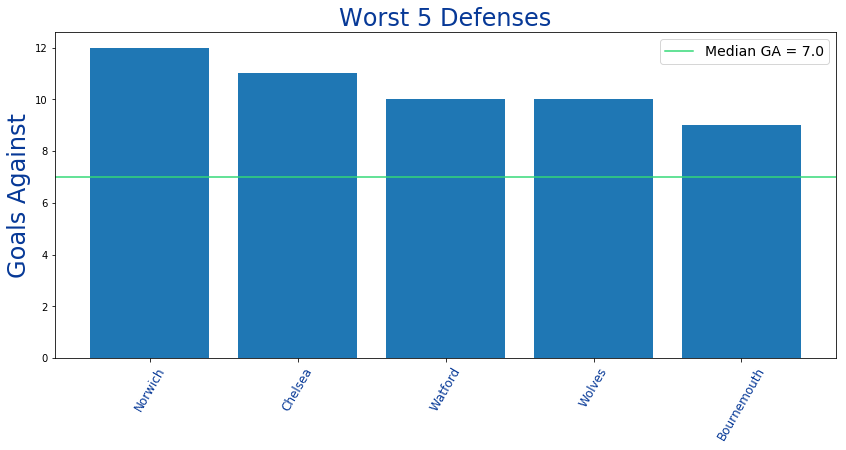

In [113]:
X = [item[0] for item in GA_bottom5]
Y = [int(item[1]) for item in GA_bottom5]

median = teams_stats.GA.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GA = ' + str(median))
plt.ylabel('Goals Against', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Worst 5 Defenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

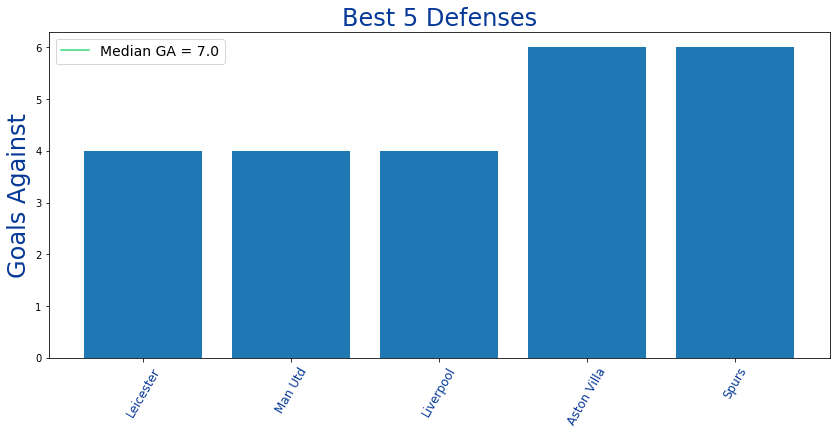

In [114]:
X = [item[0] for item in GA_top5]
Y = [int(item[1]) for item in GA_top5]

median = teams_stats.GA.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GA = ' + str(median))
plt.ylabel('Goals Against', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Best 5 Defenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

In [115]:
offense_df = teams_stats.sort_values(by = ['GF'], ascending = False)

In [116]:
offense_df.head()

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
2,MCI,Man City,5,3,1,1,16,6,+10,10
1,LIV,Liverpool,5,5,0,0,15,4,+11,15
3,TOT,Spurs,5,2,1,2,11,6,+5,8
6,CHE,Chelsea,5,2,1,2,11,11,0,8
13,NOR,Norwich,5,2,3,0,9,12,-3,6


In [117]:
GF = list(zip(offense_df.name, offense_df.GF))
GF_top5 = GF[:5]
GF_bottom5 = GF[-5:]

In [118]:
GF_top5, GF_bottom5

([('Man City', 16),
  ('Liverpool', 15),
  ('Spurs', 11),
  ('Chelsea', 11),
  ('Norwich', 9)],
 [('Southampton', 5),
  ('Aston Villa', 4),
  ('Newcastle', 4),
  ('Watford', 4),
  ('Crystal Palace', 3)])

<function matplotlib.pyplot.show(*args, **kw)>

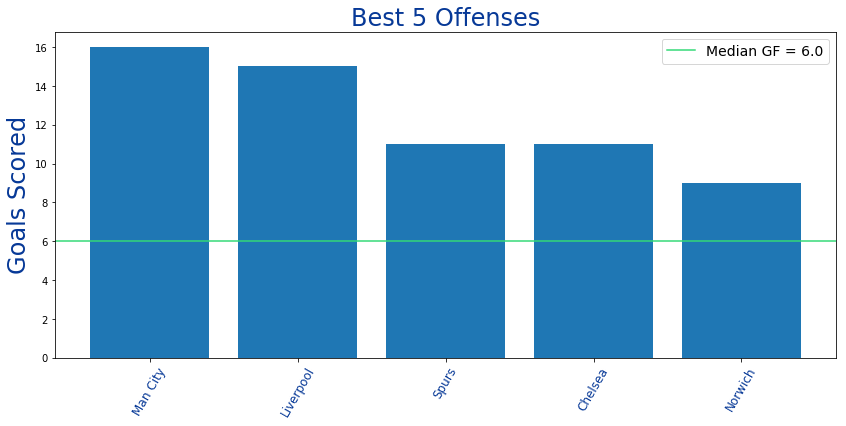

In [119]:
X = [item[0] for item in GF_top5]
Y = [int(item[1]) for item in GF_top5]

median = teams_stats.GF.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GF = ' + str(median))
plt.ylabel('Goals Scored', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Best 5 Offenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

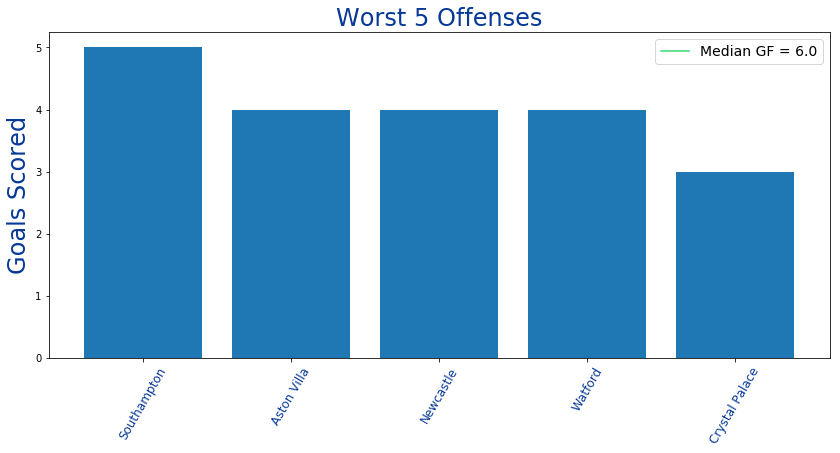

In [120]:
X = [item[0] for item in GF_bottom5]
Y = [int(item[1]) for item in GF_bottom5]

median = teams_stats.GF.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GF = ' + str(median))
plt.ylabel('Goals Scored', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Worst 5 Offenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

In [121]:
stats_df = player_df[player_df.minutes >= min_min]

In [122]:
stats_df.tail()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
460,0,4.8,347,José Holebas,Defender,0.52,0,0.42,available,57,Watford,2,10896,149625
401,0,4.9,166,Ryan Bertrand,Defender,1.08,0,0.41,available,20,Southampton,2,5610,34835
354,0,4.0,270,Grant Hanley,Defender,0.33,0,0.25,available,45,Norwich,1,150742,98866
158,0,4.9,405,Kurt Zouma,Defender,0.22,0,0.20,available,8,Chelsea,1,43733,122603
207,0,5.4,180,Fabian Delph,Defender,0.00,0,0.00,available,11,Everton,0,5481,14641


### Cobine Team and Player Stats

In [123]:
team_dic = {item:[] for item in team_names}

for row, player in stats_df.iterrows():
    for name in team_names:
        if player.team_name == name:
            playa = dict(name = player['name'], position = player.position, cost = player.cost, minutes = player.minutes, 
                         points = player.total_points,  roi = player.roi, pts_per_90min = player.pts_per_90min, 
                         bonus = player.bonus, red_cards = player.red_cards)
            team_dic[name].append(playa)

In [124]:
stats_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
355,9,7.1,442,Teemu Pukki,Forward,9.95,0,6.90,available,45,Norwich,49,2752704,376346
159,9,7.3,327,Tammy Abraham,Forward,11.52,0,5.75,available,8,Chelsea,42,1574029,231001
364,2,4.9,437,Todd Cantwell,Midfielder,5.55,0,5.51,available,45,Norwich,27,1625115,206302
414,3,4.5,450,Angus Gunn,Goalkeeper,4.79,0,5.33,available,20,Southampton,24,145315,29720
400,6,5.1,450,Jannik Vestergaard,Defender,5.39,0,5.29,available,20,Southampton,27,362645,34949


In [125]:
team_dic['Liverpool']

[{'name': 'Roberto Firmino',
  'position': 'Forward',
  'cost': 9.5,
  'minutes': 397,
  'points': 35,
  'roi': 3.68,
  'pts_per_90min': 7.91,
  'bonus': 6,
  'red_cards': 0},
 {'name': 'Mohamed Salah',
  'position': 'Midfielder',
  'cost': 12.5,
  'minutes': 438,
  'points': 45,
  'roi': 3.6,
  'pts_per_90min': 9.23,
  'bonus': 7,
  'red_cards': 0},
 {'name': 'Joel Matip',
  'position': 'Defender',
  'cost': 5.5,
  'minutes': 360,
  'points': 19,
  'roi': 3.45,
  'pts_per_90min': 4.74,
  'bonus': 1,
  'red_cards': 0},
 {'name': 'Sadio Mané',
  'position': 'Midfielder',
  'cost': 11.6,
  'minutes': 356,
  'points': 40,
  'roi': 3.45,
  'pts_per_90min': 10.08,
  'bonus': 6,
  'red_cards': 0},
 {'name': 'Trent Alexander-Arnold',
  'position': 'Defender',
  'cost': 7.1,
  'minutes': 450,
  'points': 24,
  'roi': 3.38,
  'pts_per_90min': 4.79,
  'bonus': 2,
  'red_cards': 0},
 {'name': 'Virgil van Dijk',
  'position': 'Defender',
  'cost': 6.5,
  'minutes': 450,
  'points': 21,
  'roi': 3.

### Get Final Stats per Team using Pandas

In [126]:
team_stats = {item:{} for item in team_names}

for team in team_names:
    active_players = len(stats_df[stats_df.team_name == team].cost)
    tot_cost = round(stats_df[stats_df.team_name == team].cost.sum(), 3)
    tot_pts = round(stats_df[stats_df.team_name == team].total_points.sum(), 3)
    avg_player_roi = round(tot_pts / tot_cost, 3)
    avg_pts_per_player = round(tot_pts / active_players, 3)
    
    stats = dict(active_players = active_players, tot_cost = tot_cost, tot_pts = tot_pts,
               avg_pts_per_player = avg_pts_per_player,  avg_player_roi =  avg_player_roi)
    
    team_stats[team].update(stats)
    
    

In [127]:
team_stats['Newcastle']

{'active_players': 14,
 'tot_cost': 69.5,
 'tot_pts': 164,
 'avg_pts_per_player': 11.714,
 'avg_player_roi': 2.36}

In [128]:
team_stats_df = pd.DataFrame(team_stats).T

In [129]:
team_stats_df.sort_values(by = ['avg_pts_per_player'], ascending = False, inplace = True)

In [130]:
team_stats_df

,active_players,avg_player_roi,avg_pts_per_player,tot_cost,tot_pts
Liverpool,14.0,2.853,19.929,97.8,279.0
Man City,15.0,2.571,19.400,113.2,291.0
Man Utd,14.0,2.558,15.786,86.4,221.0
Leicester,13.0,2.621,15.000,74.4,195.0
Aston Villa,13.0,2.861,14.462,65.7,188.0
West Ham,14.0,2.580,14.429,78.3,202.0
Spurs,14.0,2.202,14.357,91.3,201.0
Burnley,12.0,2.605,13.917,64.1,167.0
Everton,15.0,2.186,13.000,89.2,195.0
Arsenal,15.0,2.063,12.667,92.1,190.0


### Build a team using 90min Stat

In [131]:
#define money team as empty list and list that tracks count of players selectd per team
money_team = []
players_selected = []
teams_selected = []

#Instantiate initial count per position
#Current players selected for each position
DF_curr = 0
MD_curr = 0 
ST_curr = 0

GK_budget = budget*GK_coef
print(GK_budget)

for item in GK_90min:
    if item['cost'] <= 5.5 and item['cost'] <= GK_budget:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        GK_budget -= item['cost']
        print('Player Selected: ' + item['name'])
        print('GK budget left: ' + str(GK_budget))

print(players_selected)
print(teams_selected)

9.5
Player Selected: Lukasz Fabianski
GK budget left: 4.5
Player Selected: Dean Henderson
GK budget left: 0.0
['Lukasz Fabianski', 'Dean Henderson']
['West Ham', 'Sheffield Utd']


### Select top 3 players by points per position

In [132]:
DF_budget = budget*DF_coef + GK_budget
MD_budget = budget*MD_coef
ST_budget = budget*ST_coef

print(DF_budget, MD_budget, ST_budget)

#Select Top Defender
money_team.append(DF_pts[0])
players_selected.append(DF_pts[0]['name'])
teams_selected.append(DF_pts[0]['team_name'])
DF_budget -= DF_pts[0]['cost']
DF_curr += 1
print('Player Selected: ' + DF_pts[0]['name'])
print('DF budget left: ' + str(DF_budget))

#Select Top Midfielder
money_team.append(MD_pts[0])
players_selected.append(MD_pts[0]['name'])
teams_selected.append(MD_pts[0]['team_name'])
MD_budget -= MD_pts[0]['cost']
MD_curr += 1
print('Player Selected: ' + MD_pts[0]['name'])
print('MD budget left: ' + str(MD_budget))


print(players_selected)
print(teams_selected)

28.499999999999996 36.0 26.0
Player Selected: Trent Alexander-Arnold
DF budget left: 21.4
Player Selected: Mohamed Salah
MD budget left: 23.5
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool']


In [133]:
#Select Top Striker

for item in ST_pts[:3]:
    if teams_selected.count(item['team_name']) < 3 and len(money_team) == 4:
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
    break

print(len(money_team))
print(players_selected)
print(teams_selected)

Player Selected: Teemu Pukki
ST budget left: 18.9
5
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah', 'Teemu Pukki']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool', 'Norwich']


In [134]:
print(DF_curr, MD_curr, ST_curr)

1 1 1


In [135]:
print(DF, MD, ST)

3 4 3


### Fill rest of team with 90_min_stats

In [136]:
for item in DF_90min:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < DF_budget and DF_curr < DF:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        DF_budget -= item['cost']
        DF_curr += 1
        print('Player Selected: ' + item['name'])
        print('DF budget left: ' + str(DF_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and DF_max != DF_curr and item['cost'] <= DF_budget / (DF_max - DF_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            DF_budget -= item['cost']
            DF_curr += 1
            print('Player Selected: ' + item['name'])
            print('DF budget left: ' + str(DF_budget))
            print('# of DFs selected: ' + str(DF_curr))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Romain Saïss
DF budget left: 17.0
Player Selected: Fikayo Tomori
DF budget left: 12.5
Player Selected: Lucas Digne
DF budget left: 6.3
# of DFs selected: 4
Player Selected: Matt Doherty
DF budget left: 0.2999999999999998
# of DFs selected: 5
9
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah', 'Teemu Pukki', 'Romain Saïss', 'Fikayo Tomori', 'Lucas Digne', 'Matt Doherty']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool', 'Norwich', 'Wolves', 'Chelsea', 'Everton', 'Wolves']


In [137]:
#move leftover DF budget to MD budget
MD_budget += DF_budget

for item in MD_90min:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < MD_budget and MD_curr < MD:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        MD_budget -= item['cost']
        MD_curr += 1
        print('Player Selected: ' + item['name'])
        print('MD budget left: ' + str(MD_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and MD_max != MD_curr and item['cost'] <= MD_budget / (MD_max - MD_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            MD_budget -= item['cost']
            MD_curr += 1
            print('Player Selected: ' + item['name'])
            print('MD budget left: ' + str(MD_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Sadio Mané
MD budget left: 12.200000000000001
Player Selected: Kevin De Bruyne
MD budget left: 2.4000000000000004
11
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah', 'Teemu Pukki', 'Romain Saïss', 'Fikayo Tomori', 'Lucas Digne', 'Matt Doherty', 'Sadio Mané', 'Kevin De Bruyne']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool', 'Norwich', 'Wolves', 'Chelsea', 'Everton', 'Wolves', 'Liverpool', 'Man City']


In [138]:
#move leftover MD budget to ST budget
ST_budget += MD_budget

for item in ST_90min:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < ST_budget and ST_curr < ST:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        ST_budget -= item['cost']
        ST_curr += 1
        print('Player Selected: ' + item['name'])
        print('ST budget left: ' + str(ST_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and ST_max != ST_curr and item['cost'] <= ST_budget / (ST_max - ST_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Sergio Agüero
ST budget left: 9.199999999999998
Player Selected: Tammy Abraham
ST budget left: 1.8999999999999977
13
['Lukasz Fabianski', 'Dean Henderson', 'Trent Alexander-Arnold', 'Mohamed Salah', 'Teemu Pukki', 'Romain Saïss', 'Fikayo Tomori', 'Lucas Digne', 'Matt Doherty', 'Sadio Mané', 'Kevin De Bruyne', 'Sergio Agüero', 'Tammy Abraham']
['West Ham', 'Sheffield Utd', 'Liverpool', 'Liverpool', 'Norwich', 'Wolves', 'Chelsea', 'Everton', 'Wolves', 'Liverpool', 'Man City', 'Man City', 'Chelsea']


In [139]:
money_df = pd.DataFrame(money_team)

In [140]:
money_df

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,3,5.0,450,Lukasz Fabianski,Goalkeeper,4.59,0,4.60,available,21,West Ham,23,63683,90797
1,2,4.5,450,Dean Henderson,Goalkeeper,3.59,0,4.00,available,49,Sheffield Utd,18,80451,38740
2,2,7.1,450,Trent Alexander-Arnold,Defender,4.79,0,3.38,available,14,Liverpool,24,572096,371244
3,7,12.5,438,Mohamed Salah,Midfielder,9.23,0,3.60,available,14,Liverpool,45,657982,665024
4,9,7.1,442,Teemu Pukki,Forward,9.95,0,6.90,available,45,Norwich,49,2752704,376346
5,0,4.4,157,Romain Saïss,Defender,5.13,0,2.05,available,39,Wolves,9,20406,12887
6,2,4.5,180,Fikayo Tomori,Defender,4.97,0,2.22,available,8,Chelsea,10,36685,5083
7,3,6.2,432,Lucas Digne,Defender,4.78,0,3.71,available,11,Everton,23,751770,387517
8,0,6.0,244,Matt Doherty,Defender,4.78,0,2.17,available,39,Wolves,13,35802,113484
9,6,11.6,356,Sadio Mané,Midfielder,10.08,0,3.45,available,14,Liverpool,40,786767,401911


<function matplotlib.pyplot.show(*args, **kw)>

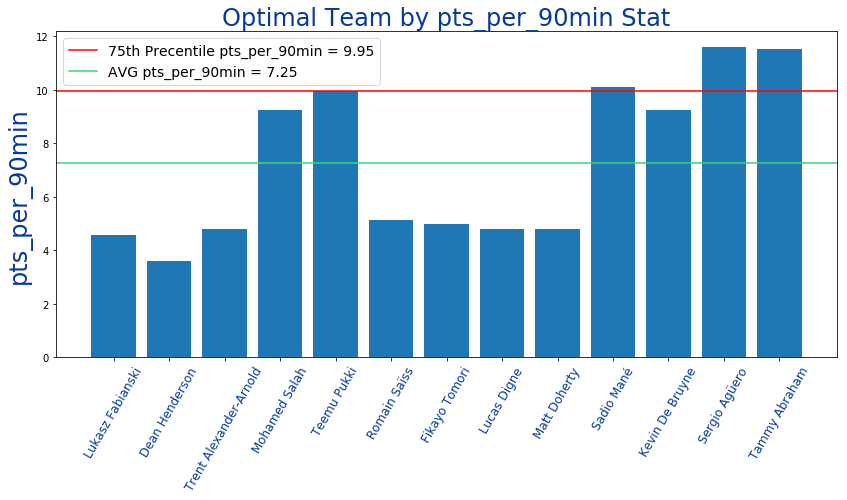

In [141]:
money_x = money_df.pts_per_90min
money_y = money_df.name
ST_75th = round(money_df.describe().pts_per_90min['75%'], 2)
ST_AVG = round(money_df.describe().pts_per_90min['mean'], 2)

plt.bar(money_y, money_x)
plt.axhline(y=ST_75th, color='r', linestyle='-', label='75th Precentile pts_per_90min = ' + str(ST_75th))
plt.axhline(y=ST_AVG, color='#33D977', linestyle='-', label='AVG pts_per_90min = ' + str(ST_AVG))
plt.ylabel('pts_per_90min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Optimal Team by pts_per_90min Stat', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show